In [1]:
%load_ext dotenv
%dotenv
from fastai.vision.all import *

/Users/julianbaumgartner/Dev/MrPloops/venv/lib/python3.10/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):


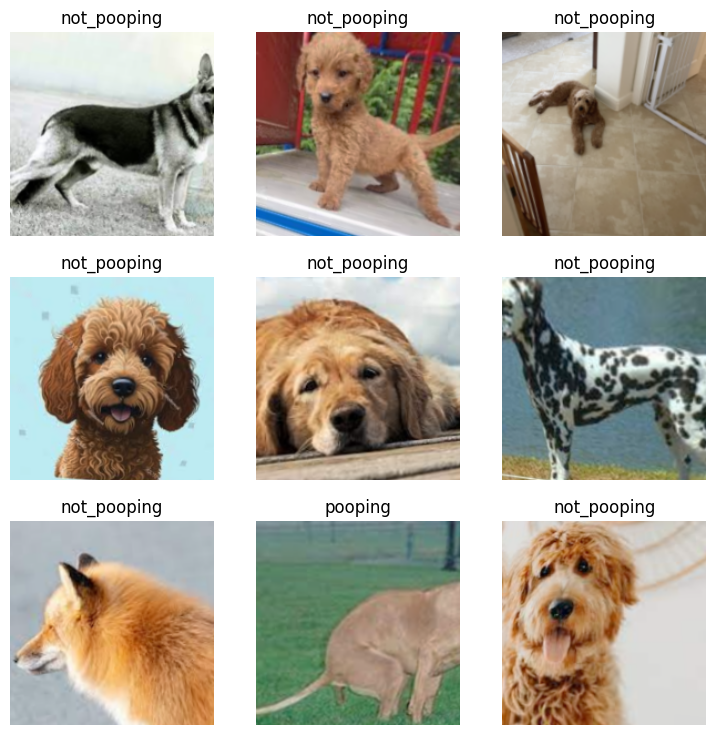

In [12]:
#Create data loader and show batch of images
path = Path("/Users/julianbaumgartner/dev/MrPloops/imgs/train/")
dataloader = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Image data and category labels (pooping or not_pooping)
    get_items=get_image_files,           # Function to get image files
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Split data into training and validation sets
    get_y=parent_label,                 # Get category labels from the parent folder name
    item_tfms=Resize(224),              # Resize images
    batch_tfms=aug_transforms(size=224, min_scale=0.75)  # Augmentations for training
).dataloaders(path)
dataloader.show_batch()

pooping


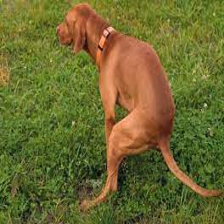

pooping


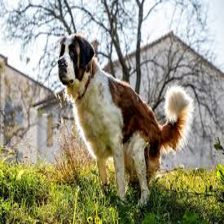

pooping


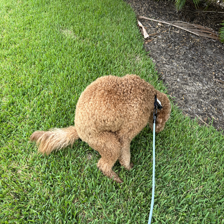

not_pooping


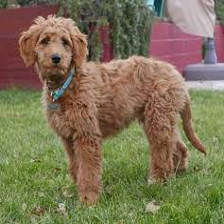

pooping


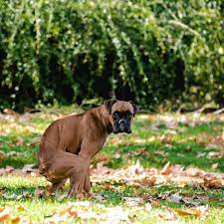

pooping


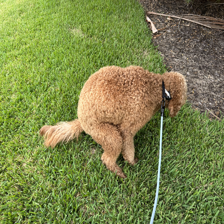

pooping


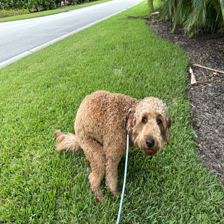

pooping


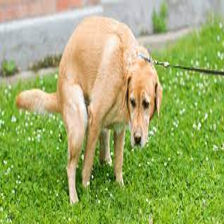

pooping


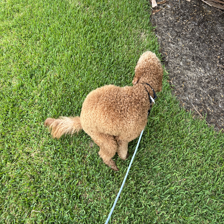

pooping


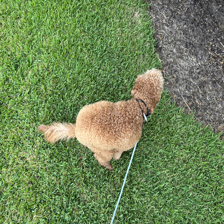

pooping


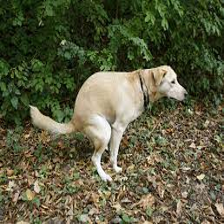

not_pooping


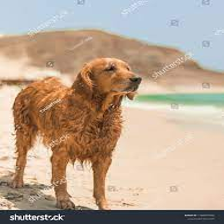

pooping


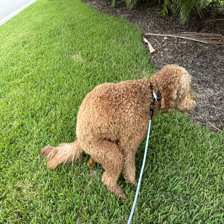

pooping


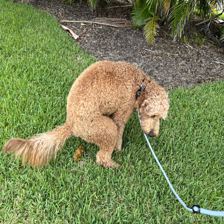

not_pooping


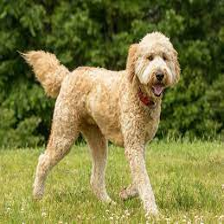

In [16]:
# Run predictions on test imgs
import PIL
import os
img_dir = "/Users/julianbaumgartner/dev/MrPloops/imgs/test"
for img in os.listdir(img_dir):
    img = PIL.Image.open(os.path.join(img_dir, img))
    img = img.resize((224, 224))
    prediction = learn.predict(img)
    print(prediction[0])
    display(img)

In [15]:
#Create learner, train and save model file
learn = vision_learner(dataloader, resnet34, metrics=accuracy)
learn.fine_tune(9)
learn.export("dog_be_pooping.pkl")

In [32]:
learn = load_learner('dog_be_pooping.pkl')

('pooping', tensor(1), tensor([2.0379e-07, 1.0000e+00]))
pooping


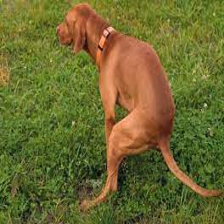

('not_pooping', tensor(0), tensor([0.9469, 0.0531]))
not_pooping


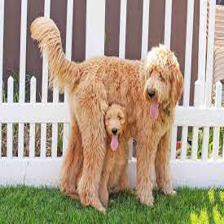

('pooping', tensor(1), tensor([0.0015, 0.9985]))
pooping


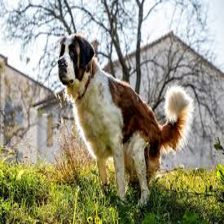

('pooping', tensor(1), tensor([1.1901e-14, 1.0000e+00]))
pooping


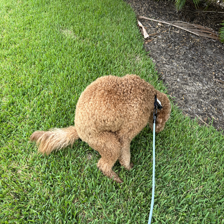

('not_pooping', tensor(0), tensor([9.9984e-01, 1.6111e-04]))
not_pooping


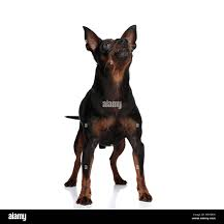

('not_pooping', tensor(0), tensor([0.9987, 0.0013]))
not_pooping


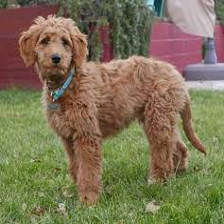

('pooping', tensor(1), tensor([3.1484e-08, 1.0000e+00]))
pooping


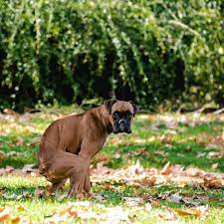

('pooping', tensor(1), tensor([2.9997e-12, 1.0000e+00]))
pooping


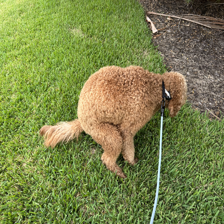

('pooping', tensor(1), tensor([5.2967e-08, 1.0000e+00]))
pooping


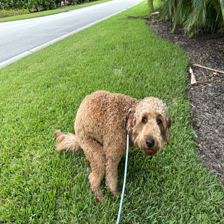

('pooping', tensor(1), tensor([1.8162e-11, 1.0000e+00]))
pooping


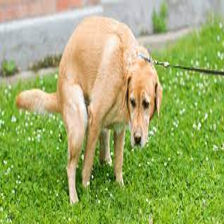

('pooping', tensor(1), tensor([1.1761e-08, 1.0000e+00]))
pooping


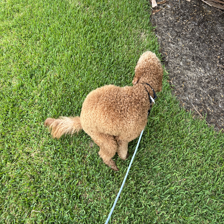

('pooping', tensor(1), tensor([2.8272e-07, 1.0000e+00]))
pooping


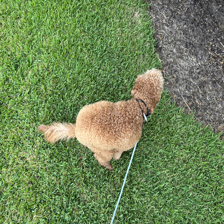

('pooping', tensor(1), tensor([1.2750e-14, 1.0000e+00]))
pooping


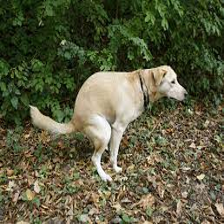

('not_pooping', tensor(0), tensor([0.9868, 0.0132]))
not_pooping


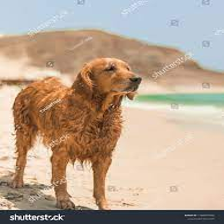

('pooping', tensor(1), tensor([2.2900e-12, 1.0000e+00]))
pooping


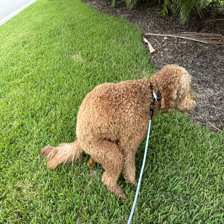

('not_pooping', tensor(0), tensor([9.9997e-01, 2.5495e-05]))
not_pooping


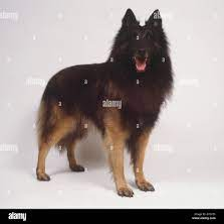

('pooping', tensor(1), tensor([5.5424e-17, 1.0000e+00]))
pooping


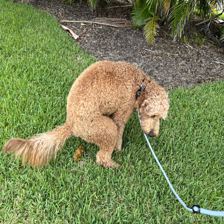

('not_pooping', tensor(0), tensor([9.9987e-01, 1.3255e-04]))
not_pooping


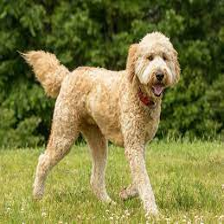

In [19]:
import PIL
import os
img_dir = "/Users/julianbaumgartner/dev/MrPloops/imgs/test"
for img in os.listdir(img_dir):
    if not img.endswith(".jpeg"):
        continue
    img = PIL.Image.open(os.path.join(img_dir, img))
    img = img.resize((224, 224))
    prediction = learn.predict(img)
    print(prediction)
    print(prediction[0])
    display(img)